In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns

In [26]:
def k_neareast_neighbour(df, k):
    data = [(float(x),float(y)) for x, y in df[['X1', 'X2']].values ]
    nearest_neighbour = []
    nn_distances = []
    knn_distance = []
    for point in data:
        distances = [math.sqrt((point[0]-x[0] )**2+ (point[1]-x[1])**2) for x in data]
        knn = np.argsort(distances)[1:k+1]
        nearest_neighbour.append([i for i in knn])
        nn_distances.append([distances[i] for i in knn])
        knn_distance.append(distances[knn[-1]])
    return nearest_neighbour, nn_distances, knn_distance

def reachability_distance(nearest_neighbour_index, nearest_neighbour_distance, knn_distance):
    rd = 0
    for nni, nnd in zip(nearest_neighbour_index, nearest_neighbour_distance):
        rd = rd + max(knn_distance[nni], nnd)
    return rd
    

       X1    X2        lrd        lof
35   45.0  60.0  27.438875   6.223839
43   80.0  40.5  30.368301   2.408920
51   70.0   5.0  39.124333   8.967817
62   30.0  60.5  27.939811   6.592834
92   10.7  99.3  68.555130  12.026509
111  60.5  60.5  28.142660   2.534447
132  10.0  30.0  24.337969   5.604251
157  99.0  20.0  47.032464   3.833396


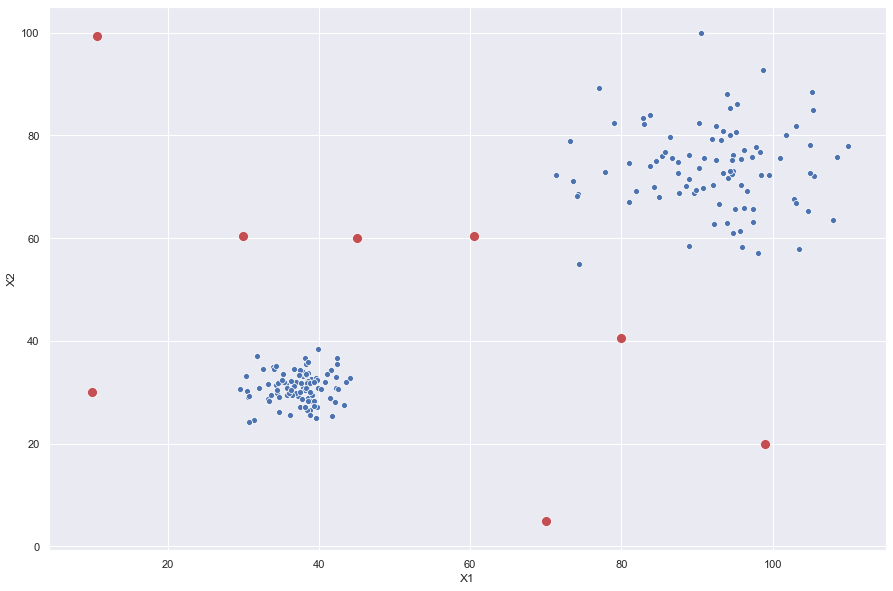

In [98]:
def local_outlier_factor(df, k, threshold):
    knn = k_neareast_neighbour(df, k)
    nearest_neighbours_indexes = knn[0]
    nearest_neighbour_distances = knn[1]
    knn_distance = knn[2]
    lrd = []
        
    lrd = np.array([reachability_distance(x, y, knn_distance) 
          for x,y in zip(nearest_neighbours_indexes, nearest_neighbour_distances)]) / k
    df['lrd'] = lrd
    lof = []
    for idx, nni in enumerate(nearest_neighbours_indexes):
        lof.append(np.mean([lrd[idx]/lrd[x] for x in nni]))
    df['lof'] = lof
    df_outlier = df[df['lof'] > threshold]
    print(df_outlier)
    sns.set(rc={'figure.figsize':(15,10)})
    sns.scatterplot(x="X1", y="X2", data=df)
    sns.scatterplot(x="X1", y="X2", data=df_outlier, s=100, color='r')
    
    return df
    
def main():
    df = pd.read_csv('./outliers-3.csv')
    k = 40
    threshold = 2
    df_with_lof = local_outlier_factor(df, k, threshold)

if __name__ == "__main__":
    main()

In [15]:
df = pd.read_csv('./outliers-3.csv')
k = 6
knn = k_neareast_neighbour(df, k)
nearest_neighbours_indexes = knn[0]
nearest_neighbour_distances = knn[1]
knn_distance = knn[2]

In [17]:
b = [np.amax(x) for x in nearest_neighbour_distances]
np.array_equal(knn_distance,b)

True

In [183]:
lrd = [(np.mean(x)) for x in nearest_neighbour_distances]
df['lrd'] = lrd

In [184]:
lof = []
for idx, nni in enumerate(nearest_neighbours_indexes):
    lof.append(np.mean([lrd[idx]/lrd[x] for x in nni]))

In [218]:
df['lof'] = lof

In [203]:
df_outlier = df[df['lof'] > 2.3]
df_outlier

,X1,X2,lrd,lof
35,45.0,60.0,20.854867,5.775198
43,80.0,40.5,22.443131,4.783406
50,90.5,99.9,14.543609,2.727899
51,70.0,5.0,35.280933,11.205348
62,30.0,60.5,23.270556,8.987357
92,10.7,99.3,59.401519,7.166865
111,60.5,60.5,15.841012,2.411267
132,10.0,30.0,20.616738,9.288632
157,99.0,20.0,35.688856,4.722218


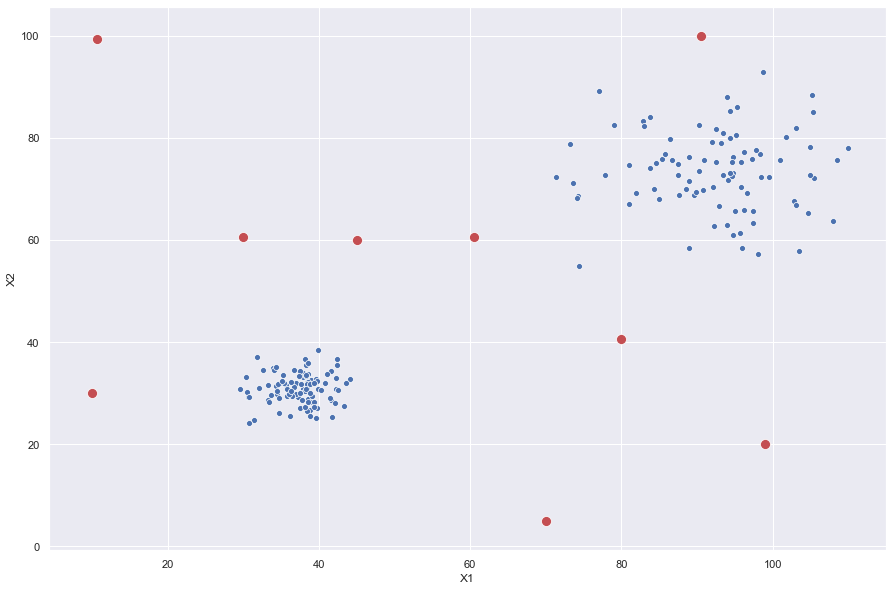

In [204]:
sns.set(rc={'figure.figsize':(15,10)})
sns.scatterplot(x="X1", y="X2", data=df)
sns.scatterplot(x="X1", y="X2", data=df_outlier, s =100, color='r')

In [216]:
df

,X1,X2
0,36.76,34.53
1,83.84,74.11
2,36.22,25.51
3,89.61,68.73
4,90.27,73.57
...,...,...
194,101.83,80.14
195,40.76,31.98
196,33.25,31.60
197,36.25,30.41
